Import Necessary libraries

In [162]:
import numpy as np  # numpy arrays
import matplotlib.pyplot as plt # data visualization
from scipy.signal import ShortTimeFFT, get_window # spectrogram
from scipy.signal.windows import hann # preferred window
from IPython.display import Audio # audio playback

In [163]:
fs = 40000 # Sampling frequency
T = 1 # Duration of signal
N = T * fs # Number of signal samples
t = np.arange(0, T, 1/fs)  # time indexes for signal

delta=0.07
mu = 5000
f0 = 2000

In [164]:
# Define transmitted, received, and mixed signals

xt = np.cos(2*np.pi*(mu*(t**2)+f0*t))  # transmitted signal
rt = np.cos(2*np.pi*(mu*((t-delta)**2)+f0*(t-delta)))  # received signal (delayed by delta)
mt = xt*rt # mixed (IF) signal

**Spectrogram Plotting**

Before plotting the spectrogram of each of these three signals, we need to look at the **ShortTimeFFT** function of Scipy. It is a function used to perform short-time Fourier transform (STFT) and quantify how a nonstationary signal's frequency and phase content changes over time.

Key parameters of the ShortTimeFFT function.
  1. Window type: Windows are used to emphasize certain parts of a signal while de-emphasizing or attenuating others. It includes windows such as the rectangular window, hanning window, gaussian window etc. **Preferred is Hanning.**

  2. Hop: The increment in samples by which the window is shifted in each step. **It has to be the half of the window length.**

  3. mfft: The length of the FFT used.

  4. fft_mode: Mode of utilized FFT (‘twosided’, ‘centered’, ‘onesided’ or ‘onesided2X’).



 Let's see an example using one of the signals defined at the beginning of the notebook.


 Define Parameters

In [165]:
# Example: Let's plot the spectrogram of  the x_0 signal

# Step 1: Specify the window type
w = hann(1000, sym=True)  # True for symmetric hanning window and false for periodic window

# Step 2: Specify the Hop size: Must be half of the window length
h = int(w.size / 2)

# Step 3: Magnitude of the segment (optional)
# if not set, it defaults to the window length

# Step 4: specify the FFT mode
fftmode = 'centered'

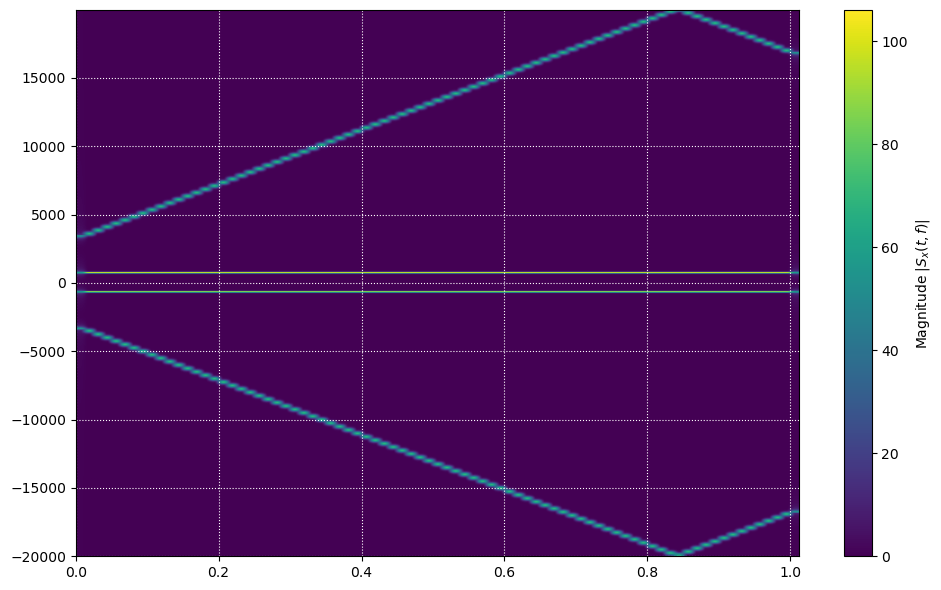

In [166]:
# Initializing an instance that calls the constructor
SFT = ShortTimeFFT(w, hop=h, fs=fs, fft_mode=fftmode)

# Perform actual STFT on the signal
# It breaks the signal into overlapping segments (based on the window function and hop size)
# Applies an FFT to each segment and then combines the results into a time-frequency representation of the signal
Sx = SFT.stft(mt)

# Set time and frequency range
# Extent is used to define the edges of the plot
# It likely returns the full plotting range of the STFT result, which includes both the time and frequency ranges
t_lo, t_hi = SFT.extent(N)[:2]  # Time range of plot

# Fgure dimensions
fig, ax = plt.subplots(figsize=(10, 6))

#ax.set_xlim(t_lo, t_hi)  # Set time range
#ax.set_ylim(0, 2000)  # Set frequency range (adjust as needed) x_2
#ax.set_ylim(0,300)  # x_0
#ax.set_ylim(0,1000)  # x_1

# Plot the spectrogram
im = ax.imshow(abs(Sx), origin='lower', aspect='auto',
                     extent=SFT.extent(N), cmap='viridis')

ax.grid(color='w', linestyle=':')

# Add colorbar and layout adjustments
fig.colorbar(im, label='Magnitude $|S_x(t, f)|$')
fig.tight_layout()

# Show the plot
plt.show()